# Chapter 3

## Cleaning data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter

In [2]:
df = pd.read_csv('../data/nyc_temperatures.csv')
df.head()

date datatype            station attributes  value
0  2018-10-01T00:00:00     TAVG  GHCND:USW00014732      H,,S,   21.2
1  2018-10-01T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2  2018-10-01T00:00:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
3  2018-10-02T00:00:00     TAVG  GHCND:USW00014732      H,,S,   22.7
4  2018-10-02T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1

### Renaming columns

In [3]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [4]:
df.rename(
    columns={'value': 'temp_C', 'attributes': 'flags'},
    inplace=True
)

In [5]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [6]:
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

### Type conversion

In [7]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [8]:
df.loc[:, 'date'] = pd.to_datetime(df.date)

C:\Users\tmadu\AppData\Local\Temp\ipykernel_16704\3775003106.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'date'] = pd.to_datetime(df.date)


In [9]:
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [10]:
df.date.describe(datetime_is_numeric=True)

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: date, dtype: object

In [11]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

In [12]:
eastern = pd.read_csv(
    '../data/nyc_temperatures.csv',
    index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

datatype            station attributes  value
date                                                                   
2018-10-01 00:00:00-05:00     TAVG  GHCND:USW00014732      H,,S,   21.2
2018-10-01 00:00:00-05:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2018-10-01 00:00:00-05:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
2018-10-02 00:00:00-05:00     TAVG  GHCND:USW00014732      H,,S,   22.7
2018-10-02 00:00:00-05:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1

In [13]:
eastern.tz_convert('UTC').head()

datatype            station attributes  value
date                                                                   
2018-10-01 05:00:00+00:00     TAVG  GHCND:USW00014732      H,,S,   21.2
2018-10-01 05:00:00+00:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2018-10-01 05:00:00+00:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
2018-10-02 05:00:00+00:00     TAVG  GHCND:USW00014732      H,,S,   22.7
2018-10-02 05:00:00+00:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1

In [14]:
eastern.tz_localize(None).to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

In [15]:
eastern.tz_localize(None).to_period('M').to_timestamp().index

DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

In [16]:
df = pd.read_csv('../data/nyc_temperatures.csv').rename(
    columns={'value': 'temp_C', 'attributes': 'flags'}
)

In [17]:
new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9 / 5) + 32
)

In [18]:
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [19]:
new_df.head()

date datatype            station     flags  temp_C  temp_F
0 2018-10-01     TAVG  GHCND:USW00014732     H,,S,    21.2   70.16
1 2018-10-01     TMAX  GHCND:USW00014732  ,,W,2400    25.6   78.08
2 2018-10-01     TMIN  GHCND:USW00014732  ,,W,2400    18.3   64.94
3 2018-10-02     TAVG  GHCND:USW00014732     H,,S,    22.7   72.86
4 2018-10-02     TMAX  GHCND:USW00014732  ,,W,2400    26.1   78.98

In [20]:
df = df.assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_C_whole=lambda df_: df_.temp_C.astype('int'),
    temp_F=lambda df_: (df_.temp_C * 9/5) + 32,
    temp_F_whole=lambda df_: df_.temp_F.astype('int')
)
df.head()

date datatype            station     flags  temp_C  temp_C_whole  \
0 2018-10-01     TAVG  GHCND:USW00014732     H,,S,    21.2            21   
1 2018-10-01     TMAX  GHCND:USW00014732  ,,W,2400    25.6            25   
2 2018-10-01     TMIN  GHCND:USW00014732  ,,W,2400    18.3            18   
3 2018-10-02     TAVG  GHCND:USW00014732     H,,S,    22.7            22   
4 2018-10-02     TMAX  GHCND:USW00014732  ,,W,2400    26.1            26   

   temp_F  temp_F_whole  
0   70.16            70  
1   78.08            78  
2   64.94            64  
3   72.86            72  
4   78.98            78

In [21]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)

In [22]:
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int32
temp_F                 float64
temp_F_whole             int32
dtype: object

In [23]:
df_with_categories.describe(include='category')

datatype            station
count        93                 93
unique        3                  1
top        TAVG  GHCND:USW00014732
freq         31                 93

In [24]:
pd.Categorical(
    ['med', 'med', 'low', 'high'],
    categories=['low','med','high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

### Reordering, reindexing, and sorting data

In [25]:
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending=False).head(10)

date datatype            station     flags  temp_C  temp_C_whole  \
19 2018-10-07     TMAX  GHCND:USW00014732  ,,W,2400    27.8            27   
28 2018-10-10     TMAX  GHCND:USW00014732  ,,W,2400    27.8            27   
31 2018-10-11     TMAX  GHCND:USW00014732  ,,W,2400    26.7            26   
10 2018-10-04     TMAX  GHCND:USW00014732  ,,W,2400    26.1            26   
4  2018-10-02     TMAX  GHCND:USW00014732  ,,W,2400    26.1            26   
1  2018-10-01     TMAX  GHCND:USW00014732  ,,W,2400    25.6            25   
25 2018-10-09     TMAX  GHCND:USW00014732  ,,W,2400    25.6            25   
7  2018-10-03     TMAX  GHCND:USW00014732  ,,W,2400    25.0            25   
13 2018-10-05     TMAX  GHCND:USW00014732  ,,W,2400    22.8            22   
22 2018-10-08     TMAX  GHCND:USW00014732  ,,W,2400    22.8            22   

    temp_F  temp_F_whole  
19   82.04            82  
28   82.04            82  
31   80.06            80  
10   78.98            78  
4    78.98            78  
1    78.08            78  
25   78.08            78  
7    77.00            77  
13   73.04            73  
22   73.04            73

In [26]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True]).head(10)

date datatype            station     flags  temp_C  temp_C_whole  \
19 2018-10-07     TMAX  GHCND:USW00014732  ,,W,2400    27.8            27   
28 2018-10-10     TMAX  GHCND:USW00014732  ,,W,2400    27.8            27   
31 2018-10-11     TMAX  GHCND:USW00014732  ,,W,2400    26.7            26   
4  2018-10-02     TMAX  GHCND:USW00014732  ,,W,2400    26.1            26   
10 2018-10-04     TMAX  GHCND:USW00014732  ,,W,2400    26.1            26   
1  2018-10-01     TMAX  GHCND:USW00014732  ,,W,2400    25.6            25   
25 2018-10-09     TMAX  GHCND:USW00014732  ,,W,2400    25.6            25   
7  2018-10-03     TMAX  GHCND:USW00014732  ,,W,2400    25.0            25   
13 2018-10-05     TMAX  GHCND:USW00014732  ,,W,2400    22.8            22   
22 2018-10-08     TMAX  GHCND:USW00014732  ,,W,2400    22.8            22   

    temp_F  temp_F_whole  
19   82.04            82  
28   82.04            82  
31   80.06            80  
4    78.98            78  
10   78.98            78  
1    78.08            78  
25   78.08            78  
7    77.00            77  
13   73.04            73  
22   73.04            73

In [27]:
df.query('datatype == "TAVG"').nlargest(n=10, columns='temp_C')

date datatype            station  flags  temp_C  temp_C_whole  \
27 2018-10-10     TAVG  GHCND:USW00014732  H,,S,    23.8            23   
30 2018-10-11     TAVG  GHCND:USW00014732  H,,S,    23.4            23   
18 2018-10-07     TAVG  GHCND:USW00014732  H,,S,    22.8            22   
3  2018-10-02     TAVG  GHCND:USW00014732  H,,S,    22.7            22   
6  2018-10-03     TAVG  GHCND:USW00014732  H,,S,    21.8            21   
24 2018-10-09     TAVG  GHCND:USW00014732  H,,S,    21.8            21   
9  2018-10-04     TAVG  GHCND:USW00014732  H,,S,    21.3            21   
0  2018-10-01     TAVG  GHCND:USW00014732  H,,S,    21.2            21   
21 2018-10-08     TAVG  GHCND:USW00014732  H,,S,    20.9            20   
12 2018-10-05     TAVG  GHCND:USW00014732  H,,S,    20.3            20   

    temp_F  temp_F_whole  
27   74.84            74  
30   74.12            74  
18   73.04            73  
3    72.86            72  
6    71.24            71  
24   71.24            71  
9    70.34            70  
0    70.16            70  
21   69.62            69  
12   68.54            68

In [28]:
df.sample(5, random_state=0).index

Int64Index([2, 30, 55, 16, 13], dtype='int64')

In [29]:
df.sample(5, random_state=0).sort_index().index

Int64Index([2, 13, 16, 30, 55], dtype='int64')

In [30]:
df.sort_index(axis=1).head()

datatype       date     flags            station  temp_C  temp_C_whole  \
0     TAVG 2018-10-01     H,,S,  GHCND:USW00014732    21.2            21   
1     TMAX 2018-10-01  ,,W,2400  GHCND:USW00014732    25.6            25   
2     TMIN 2018-10-01  ,,W,2400  GHCND:USW00014732    18.3            18   
3     TAVG 2018-10-02     H,,S,  GHCND:USW00014732    22.7            22   
4     TMAX 2018-10-02  ,,W,2400  GHCND:USW00014732    26.1            26   

   temp_F  temp_F_whole  
0   70.16            70  
1   78.08            78  
2   64.94            64  
3   72.86            72  
4   78.98            78

In [31]:
df.equals(df.sort_values(by='temp_C'))

False

In [32]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

In [33]:
df.set_index('date', inplace=True)
df.head()

datatype            station     flags  temp_C  temp_C_whole  \
date                                                                     
2018-10-01     TAVG  GHCND:USW00014732     H,,S,    21.2            21   
2018-10-01     TMAX  GHCND:USW00014732  ,,W,2400    25.6            25   
2018-10-01     TMIN  GHCND:USW00014732  ,,W,2400    18.3            18   
2018-10-02     TAVG  GHCND:USW00014732     H,,S,    22.7            22   
2018-10-02     TMAX  GHCND:USW00014732  ,,W,2400    26.1            26   

            temp_F  temp_F_whole  
date                              
2018-10-01   70.16            70  
2018-10-01   78.08            78  
2018-10-01   64.94            64  
2018-10-02   72.86            72  
2018-10-02   78.98            78

In [34]:
df['2018-10-11':'2018-10-12']

datatype            station     flags  temp_C  temp_C_whole  \
date                                                                     
2018-10-11     TAVG  GHCND:USW00014732     H,,S,    23.4            23   
2018-10-11     TMAX  GHCND:USW00014732  ,,W,2400    26.7            26   
2018-10-11     TMIN  GHCND:USW00014732  ,,W,2400    21.7            21   
2018-10-12     TAVG  GHCND:USW00014732     H,,S,    18.3            18   
2018-10-12     TMAX  GHCND:USW00014732  ,,W,2400    22.2            22   
2018-10-12     TMIN  GHCND:USW00014732  ,,W,2400    12.2            12   

            temp_F  temp_F_whole  
date                              
2018-10-11   74.12            74  
2018-10-11   80.06            80  
2018-10-11   71.06            71  
2018-10-12   64.94            64  
2018-10-12   71.96            71  
2018-10-12   53.96            53

In [35]:
df['2018-10-11':'2018-10-12'].reset_index()

date datatype            station     flags  temp_C  temp_C_whole  \
0 2018-10-11     TAVG  GHCND:USW00014732     H,,S,    23.4            23   
1 2018-10-11     TMAX  GHCND:USW00014732  ,,W,2400    26.7            26   
2 2018-10-11     TMIN  GHCND:USW00014732  ,,W,2400    21.7            21   
3 2018-10-12     TAVG  GHCND:USW00014732     H,,S,    18.3            18   
4 2018-10-12     TMAX  GHCND:USW00014732  ,,W,2400    22.2            22   
5 2018-10-12     TMIN  GHCND:USW00014732  ,,W,2400    12.2            12   

   temp_F  temp_F_whole  
0   74.12            74  
1   80.06            80  
2   71.06            71  
3   64.94            64  
4   71.96            71  
5   53.96            53

In [36]:
sp = pd.read_csv(
    '../data/sp500.csv', index_col='date', parse_dates=True
).drop(columns=['adj_close'])

In [37]:
sp.head()

high          low         open        close      volume
date                                                                      
2017-01-03  2263.879883  2245.129883  2251.570068  2257.830078  3770530000
2017-01-04  2272.820068  2261.600098  2261.600098  2270.750000  3764890000
2017-01-05  2271.500000  2260.449951  2268.179932  2269.000000  3761820000
2017-01-06  2282.100098  2264.060059  2271.139893  2276.979980  3339890000
2017-01-09  2275.489990  2268.899902  2273.590088  2268.899902  3217610000

In [38]:
sp.head(10).assign(day_of_week = lambda df_: df_.index.day_name())

high          low         open        close      volume  \
date                                                                         
2017-01-03  2263.879883  2245.129883  2251.570068  2257.830078  3770530000   
2017-01-04  2272.820068  2261.600098  2261.600098  2270.750000  3764890000   
2017-01-05  2271.500000  2260.449951  2268.179932  2269.000000  3761820000   
2017-01-06  2282.100098  2264.060059  2271.139893  2276.979980  3339890000   
2017-01-09  2275.489990  2268.899902  2273.590088  2268.899902  3217610000   
2017-01-10  2279.270020  2265.270020  2269.719971  2268.899902  3638790000   
2017-01-11  2275.320068  2260.830078  2268.600098  2275.320068  3620410000   
2017-01-12  2271.780029  2254.250000  2271.139893  2270.439941  3462130000   
2017-01-13  2278.679932  2271.510010  2272.739990  2274.639893  3081270000   
2017-01-17  2272.080078  2262.810059  2269.139893  2267.889893  3584990000   

           day_of_week  
date                    
2017-01-03     Tuesday  
2017-01-04   Wednesday  
2017-01-05    Thursday  
2017-01-06      Friday  
2017-01-09      Monday  
2017-01-10     Tuesday  
2017-01-11   Wednesday  
2017-01-12    Thursday  
2017-01-13      Friday  
2017-01-17     Tuesday

In [39]:
bitcoin = pd.read_csv(
    '../data/bitcoin.csv', index_col='date', parse_dates=True
).drop(columns=['market_cap'])

In [40]:
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(level='date').sum()
portfolio.head(10).assign(
    day_of_week=lambda df_: df_.index.day_name()
)

high          low         open        close      volume  \
date                                                                         
2017-01-01  1003.080000   958.700000   963.660000   998.330000   147775008   
2017-01-02  1031.390000   996.700000   998.620000  1021.750000   222184992   
2017-01-03  3307.959883  3266.729883  3273.170068  3301.670078  3955698000   
2017-01-04  3432.240068  3306.000098  3306.000098  3425.480000  4109835984   
2017-01-05  3462.600000  3170.869951  3424.909932  3282.380000  4272019008   
2017-01-06  3328.910098  3148.000059  3285.379893  3179.179980  3691766000   
2017-01-07   908.590000   823.560000   903.490000   908.590000   279550016   
2017-01-08   942.720000   887.250000   908.170000   911.200000   158715008   
2017-01-09  3189.179990  3148.709902  3186.830088  3171.729902  3359486992   
2017-01-10  3194.140020  3166.330020  3172.159971  3176.579902  3754598000   

           day_of_week  
date                    
2017-01-01      Sunday  
2017-01-02      Monday  
2017-01-03     Tuesday  
2017-01-04   Wednesday  
2017-01-05    Thursday  
2017-01-06      Friday  
2017-01-07    Saturday  
2017-01-08      Sunday  
2017-01-09      Monday  
2017-01-10     Tuesday

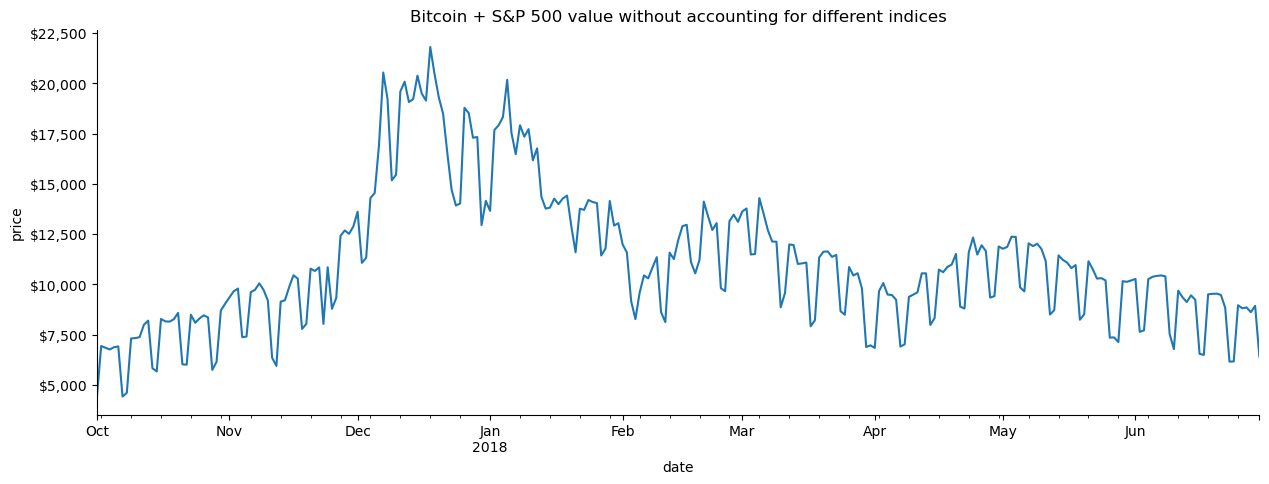

In [41]:
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15,5), legend=False,
    title='Bitcoin + S&P 500 value without accounting '
            'for different indices'
)
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

In [42]:
sp.reindex(bitcoin.index, method='ffill').head(10).assign(day_of_week=lambda df_: df_.index.day_name())

high          low         open        close        volume  \
date                                                                           
2017-01-01          NaN          NaN          NaN          NaN           NaN   
2017-01-02          NaN          NaN          NaN          NaN           NaN   
2017-01-03  2263.879883  2245.129883  2251.570068  2257.830078  3.770530e+09   
2017-01-04  2272.820068  2261.600098  2261.600098  2270.750000  3.764890e+09   
2017-01-05  2271.500000  2260.449951  2268.179932  2269.000000  3.761820e+09   
2017-01-06  2282.100098  2264.060059  2271.139893  2276.979980  3.339890e+09   
2017-01-07  2282.100098  2264.060059  2271.139893  2276.979980  3.339890e+09   
2017-01-08  2282.100098  2264.060059  2271.139893  2276.979980  3.339890e+09   
2017-01-09  2275.489990  2268.899902  2273.590088  2268.899902  3.217610e+09   
2017-01-10  2279.270020  2265.270020  2269.719971  2268.899902  3.638790e+09   

           day_of_week  
date                    
2017-01-01      Sunday  
2017-01-02      Monday  
2017-01-03     Tuesday  
2017-01-04   Wednesday  
2017-01-05    Thursday  
2017-01-06      Friday  
2017-01-07    Saturday  
2017-01-08      Sunday  
2017-01-09      Monday  
2017-01-10     Tuesday

In [43]:
sp_reindexed = sp.reindex(bitcoin.index).assign(
    volume=lambda df_: df_.volume.fillna(0),
    close=lambda df_: df_.close.fillna(method='ffill'),
    # format of np.where function: np.where(boolean condition, value if True, value if False)
    open=lambda df_: np.where(df_.open.isnull(), df_.close, df_.open),
    high=lambda df_: np.where(df_.high.isnull(), df_.close, df_.open),
    low=lambda df_: np.where(df_.low.isnull(), df_.close, df_.low)
)

In [44]:
sp_reindexed.head(10).assign(
    day_of_week=lambda df_: df_.index.day_name()
)

high          low         open        close        volume  \
date                                                                           
2017-01-01          NaN          NaN          NaN          NaN  0.000000e+00   
2017-01-02          NaN          NaN          NaN          NaN  0.000000e+00   
2017-01-03  2251.570068  2245.129883  2251.570068  2257.830078  3.770530e+09   
2017-01-04  2261.600098  2261.600098  2261.600098  2270.750000  3.764890e+09   
2017-01-05  2268.179932  2260.449951  2268.179932  2269.000000  3.761820e+09   
2017-01-06  2271.139893  2264.060059  2271.139893  2276.979980  3.339890e+09   
2017-01-07  2276.979980  2276.979980  2276.979980  2276.979980  0.000000e+00   
2017-01-08  2276.979980  2276.979980  2276.979980  2276.979980  0.000000e+00   
2017-01-09  2273.590088  2268.899902  2273.590088  2268.899902  3.217610e+09   
2017-01-10  2269.719971  2265.270020  2269.719971  2268.899902  3.638790e+09   

           day_of_week  
date                    
2017-01-01      Sunday  
2017-01-02      Monday  
2017-01-03     Tuesday  
2017-01-04   Wednesday  
2017-01-05    Thursday  
2017-01-06      Friday  
2017-01-07    Saturday  
2017-01-08      Sunday  
2017-01-09      Monday  
2017-01-10     Tuesday

In [45]:
fixed_portfolio = sp_reindexed + bitcoin

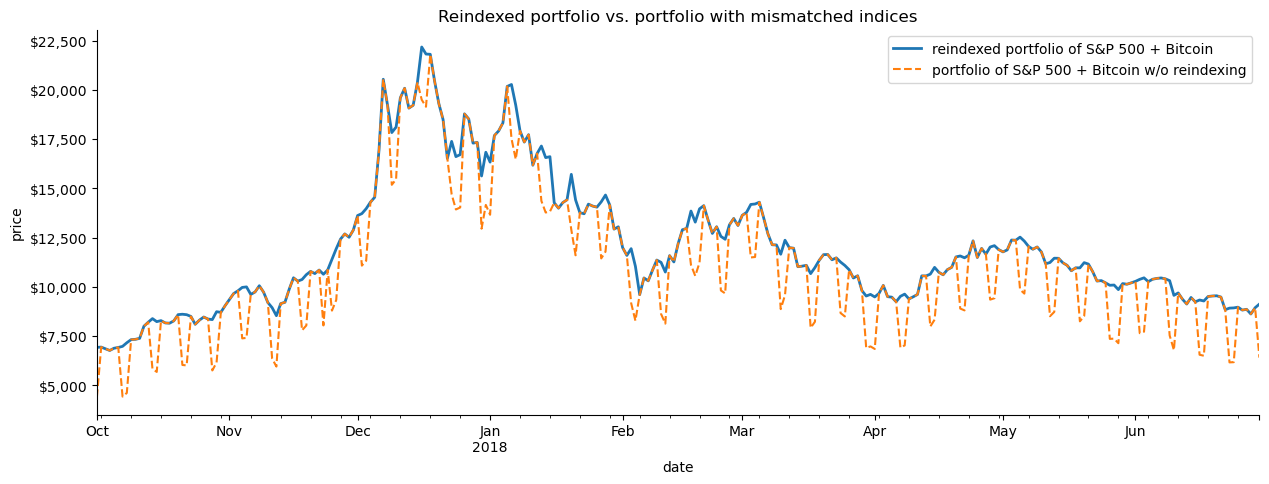

In [46]:
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15,5), linewidth=2,
    label='reindexed portfolio of S&P 500 + Bitcoin',
    title='Reindexed portfolio vs. portfolio with mismatched indices'
)
portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--',
    label='portfolio of S&P 500 + Bitcoin w/o reindexing'
)
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

## Reshaping data

In [47]:
long_df = (pd.read_csv('../data/long_data.csv', usecols=['date', 'datatype', 'value'])
    .rename(columns={'value': 'temp_C'})
    .assign(date=lambda df_: pd.to_datetime(df_.date), temp_F=lambda df_: (df_.temp_C * 9/5) + 32)
)
long_df

datatype       date  temp_C  temp_F
0      TMAX 2018-10-01    21.1   69.98
1      TMIN 2018-10-01     8.9   48.02
2      TOBS 2018-10-01    13.9   57.02
3      TMAX 2018-10-02    23.9   75.02
4      TMIN 2018-10-02    13.9   57.02
..      ...        ...     ...     ...
88     TMIN 2018-10-30     2.2   35.96
89     TOBS 2018-10-30     5.0   41.00
90     TMAX 2018-10-31    12.2   53.96
91     TMIN 2018-10-31     0.0   32.00
92     TOBS 2018-10-31     0.0   32.00

[93 rows x 4 columns]

### Transposing DataFrames

In [48]:
long_df.set_index('date').head(6).T

date     2018-10-01 2018-10-01 2018-10-01 2018-10-02 2018-10-02 2018-10-02
datatype       TMAX       TMIN       TOBS       TMAX       TMIN       TOBS
temp_C         21.1        8.9       13.9       23.9       13.9       17.2
temp_F        69.98      48.02      57.02      75.02      57.02      62.96

### Pivoting DataFrames

In [49]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values='temp_C'
)
pivoted_df.head()

datatype    TMAX  TMIN  TOBS
date                        
2018-10-01  21.1   8.9  13.9
2018-10-02  23.9  13.9  17.2
2018-10-03  25.0  15.6  16.1
2018-10-04  22.8  11.7  11.7
2018-10-05  23.3  11.7  18.9

In [50]:
pivoted_df.describe()

datatype       TMAX       TMIN       TOBS
count     31.000000  31.000000  31.000000
mean      16.829032   7.561290  10.022581
std        5.714962   6.513252   6.596550
min        7.800000  -1.100000  -1.100000
25%       12.750000   2.500000   5.550000
50%       16.100000   6.700000   8.300000
75%       21.950000  13.600000  16.100000
max       26.700000  17.800000  21.700000

In [51]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype',
    values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [52]:
pivoted_df['temp_F']['TMIN'].head()

date
2018-10-01    48.02
2018-10-02    57.02
2018-10-03    60.08
2018-10-04    53.06
2018-10-05    53.06
Name: TMIN, dtype: float64

In [53]:
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', 'datatype'])

In [54]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [55]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [56]:
extra_data = long_df.append([{
    'datatype': 'TAVG',
    'date': '2018-10-01',
    'temp_C': 10,
    'temp_F': 50
}]).set_index(['date', 'datatype']).sort_index()

C:\Users\tmadu\AppData\Local\Temp\ipykernel_16704\3317470302.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = long_df.append([{
C:\Users\tmadu\AppData\Local\Temp\ipykernel_16704\3317470302.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  }]).set_index(['date', 'datatype']).sort_index()


In [57]:
extra_data['2018-10-01':'2018-10-02']

temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96

In [58]:
extra_data.unstack().head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02    NaN  23.9  13.9  17.2    NaN  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06
2018-10-05    NaN  23.3  11.7  18.9    NaN  73.94  53.06  66.02

In [59]:
extra_data.unstack(fill_value=-40).head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06
2018-10-05  -40.0  23.3  11.7  18.9  -40.0  73.94  53.06  66.02

### Melting DataFrames

In [60]:
wide_df = pd.read_csv('../data/wide_data.csv')
wide_df.head()

date  TMAX  TMIN  TOBS
0  2018-10-01  21.1   8.9  13.9
1  2018-10-02  23.9  13.9  17.2
2  2018-10-03  25.0  15.6  16.1
3  2018-10-04  22.8  11.7  11.7
4  2018-10-05  23.3  11.7  18.9

In [61]:
melted_df = wide_df.melt(
    id_vars='date', value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_df.head()

date measurement  temp_C
0  2018-10-01        TMAX    21.1
1  2018-10-02        TMAX    23.9
2  2018-10-03        TMAX    25.0
3  2018-10-04        TMAX    22.8
4  2018-10-05        TMAX    23.3

In [62]:
wide_df.set_index('date', inplace=True)

In [65]:
stacked_series = (wide_df
    .stack()
)
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

In [66]:
stacked_df = stacked_series.to_frame('values')
stacked_df.head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

In [67]:
stacked_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', None])

In [69]:
stacked_df.index.set_names(['date', 'datatype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datatype'])

## Handling duplicate, missing, or invalid data

In [71]:
df = pd.read_csv('../data/dirty_data.csv')
df.head()

date            station  PRCP  SNOW  SNWD    TMAX  TMIN  \
0  2018-01-01T00:00:00                  ?   0.0   0.0  -inf  5505.0 -40.0   
1  2018-01-01T00:00:00                  ?   0.0   0.0  -inf  5505.0 -40.0   
2  2018-01-01T00:00:00                  ?   0.0   0.0  -inf  5505.0 -40.0   
3  2018-01-02T00:00:00  GHCND:USC00280907   0.0   0.0  -inf    -8.3 -16.1   
4  2018-01-03T00:00:00  GHCND:USC00280907   0.0   0.0  -inf    -4.4 -13.9   

   TOBS  WESF inclement_weather  
0   NaN   NaN               NaN  
1   NaN   NaN               NaN  
2   NaN   NaN               NaN  
3 -12.2   NaN             False  
4 -13.3   NaN             False

### Find the problematic data

In [72]:
df.describe()

c:\Users\tmadu\miniconda3\envs\eda\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


PRCP        SNOW   SNWD         TMAX        TMIN        TOBS  \
count  765.000000  577.000000  577.0   765.000000  765.000000  398.000000   
mean     5.360392    4.202773    NaN  2649.175294  -15.914379    8.632161   
std     10.002138   25.086077    NaN  2744.156281   24.242849    9.815054   
min      0.000000    0.000000   -inf   -11.700000  -40.000000  -16.100000   
25%      0.000000    0.000000    NaN    13.300000  -40.000000    0.150000   
50%      0.000000    0.000000    NaN    32.800000  -11.100000    8.300000   
75%      5.800000    0.000000    NaN  5505.000000    6.700000   18.300000   
max     61.700000  229.000000    inf  5505.000000   23.900000   26.100000   

            WESF  
count  11.000000  
mean   16.290909  
std     9.489832  
min     1.800000  
25%     8.600000  
50%    19.300000  
75%    24.900000  
max    28.700000

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [76]:
contain_nulls = df[
    df.SNOW.isna() | df.SNWD.isna() | df.TOBS.isna()
    | df.WESF.isna() | df.inclement_weather.isna()
]

In [77]:
contain_nulls.shape[0]

765

In [80]:
contain_nulls.head(10)

date            station  PRCP   SNOW  SNWD    TMAX  TMIN  \
0  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
1  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
2  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
3  2018-01-02T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -8.3 -16.1   
4  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
5  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
6  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
7  2018-01-04T00:00:00                  ?  20.6  229.0   inf  5505.0 -40.0   
8  2018-01-04T00:00:00                  ?  20.6  229.0   inf  5505.0 -40.0   
9  2018-01-05T00:00:00                  ?   0.3    NaN   NaN  5505.0 -40.0   

   TOBS  WESF inclement_weather  
0   NaN   NaN               NaN  
1   NaN   NaN               NaN  
2   NaN   NaN               NaN  
3 -12.2   NaN             False  
4 -13.3   NaN             False  
5 -13.3   NaN             False  
6 -13.3   NaN             False  
7   NaN  19.3              True  
8   NaN  19.3              True  
9   NaN   NaN               NaN

In [81]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

In [82]:
def get_inf_count(df):
    """Find the number of inf/-inf values per column"""
    return {
        col: df[
            df[col].isin([np.inf, -np.inf])
        ].shape[0] for col in df.columns
    }

In [83]:
get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [84]:
pd.DataFrame({
    'np.inf Snow Depth':
        df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth':
        df[df.SNWD == -np.inf].SNOW.describe()
}).T

count        mean        std   min   25%    50%    75%  \
np.inf Snow Depth    24.0  101.041667  74.498018  13.0  25.0  120.5  152.0   
-np.inf Snow Depth  553.0    0.000000   0.000000   0.0   0.0    0.0    0.0   

                      max  
np.inf Snow Depth   229.0  
-np.inf Snow Depth    0.0

In [85]:
df.describe(include='object')

date            station inclement_weather
count                   765                765               408
unique                  324                  2                 2
top     2018-07-05T00:00:00  GHCND:USC00280907             False
freq                      8                398               384

In [86]:
df[df.duplicated()].shape[0]

284

In [87]:
df[df.duplicated(keep=False)].shape[0]

482

In [88]:
df[df.duplicated(['date', 'station'])].shape[0]

284

In [89]:
df[df.duplicated()].head()

date            station  PRCP   SNOW  SNWD    TMAX  TMIN  \
1  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
2  2018-01-01T00:00:00                  ?   0.0    0.0  -inf  5505.0 -40.0   
5  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
6  2018-01-03T00:00:00  GHCND:USC00280907   0.0    0.0  -inf    -4.4 -13.9   
8  2018-01-04T00:00:00                  ?  20.6  229.0   inf  5505.0 -40.0   

   TOBS  WESF inclement_weather  
1   NaN   NaN               NaN  
2   NaN   NaN               NaN  
5 -13.3   NaN             False  
6 -13.3   NaN             False  
8   NaN  19.3              True

### Mitigating the issues

#### Preserving the `WESF` data

In [90]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

In [91]:
# 1. Perform type conversion on the `date` column
df.date = pd.to_datetime(df.date)

In [92]:
# 2. Save the WESF column as a series
station_qm_wesf = df[df.station == '?']\
    .drop_duplicates('date').set_index('date').WESF

In [93]:
# 3. Sort df by the `station` column in descending order 
# to put the station with no ID (?) last
df.sort_values(
    'station', ascending=False, inplace=True
)

In [94]:
# 4. Remove rows that are duplicated based on the date,
# keeping the first occurences, which will be the ones
# where the `station` column has an ID
df_deduped = df.drop_duplicates('date')

In [95]:
# 5. Drop the `station` column and set the index to the `date`
# so that it matches the WESF data)
df_deduped = df_deduped.drop(columns='station')\
    .set_index('date').sort_index()

In [101]:
# 6. Update the `WESF` column using the combine_first() method
# to coalesce the values to the first non-null entry
df_deduped = df_deduped.assign(
    WESF=lambda df_: df_.WESF.combine_first(station_qm_wesf)
)

In [102]:
df_deduped.shape

(324, 8)

In [103]:
df_deduped.head()

PRCP   SNOW  SNWD    TMAX  TMIN  TOBS  WESF inclement_weather
date                                                                     
2018-01-01   0.0    0.0  -inf  5505.0 -40.0   NaN   NaN               NaN
2018-01-02   0.0    0.0  -inf    -8.3 -16.1 -12.2   NaN             False
2018-01-03   0.0    0.0  -inf    -4.4 -13.9 -13.3   NaN             False
2018-01-04  20.6  229.0   inf  5505.0 -40.0   NaN  19.3              True
2018-01-05  14.2  127.0   inf    -4.4 -13.9 -13.9   NaN              True

#### Deal with the null data

In [104]:
df_deduped.dropna().shape

(4, 8)

In [106]:
df_deduped.dropna(
    how='all',
    subset=['inclement_weather', 'SNOW', 'SNWD']
    ).shape

(293, 8)

In [108]:
df_deduped.dropna(
    axis='columns',
    thresh=df_deduped.shape[0] * .75 # 75% of rows
).columns

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS', 'inclement_weather'], dtype='object')

In [109]:
df_deduped.loc[:, 'WESF'].fillna(0, inplace=True)
df_deduped.head()

PRCP   SNOW  SNWD    TMAX  TMIN  TOBS  WESF inclement_weather
date                                                                     
2018-01-01   0.0    0.0  -inf  5505.0 -40.0   NaN   0.0               NaN
2018-01-02   0.0    0.0  -inf    -8.3 -16.1 -12.2   0.0             False
2018-01-03   0.0    0.0  -inf    -4.4 -13.9 -13.3   0.0             False
2018-01-04  20.6  229.0   inf  5505.0 -40.0   NaN  19.3              True
2018-01-05  14.2  127.0   inf    -4.4 -13.9 -13.9   0.0              True

#### Remaining issues

In [110]:
df_deduped = df_deduped.assign(
    TMAX = lambda df_: df_.TMAX.replace(5505, np.nan),
    TMIN = lambda df_: df_.TMIN.replace(-40, np.nan)
)

In [111]:
df_deduped.assign(
    TMAX=lambda df_: df_.TMAX.fillna(method='ffill'),
    TMIN=lambda df_: df_.TMIN.fillna(method='ffill')
).head()

PRCP   SNOW  SNWD  TMAX  TMIN  TOBS  WESF inclement_weather
date                                                                   
2018-01-01   0.0    0.0  -inf   NaN   NaN   NaN   0.0               NaN
2018-01-02   0.0    0.0  -inf  -8.3 -16.1 -12.2   0.0             False
2018-01-03   0.0    0.0  -inf  -4.4 -13.9 -13.3   0.0             False
2018-01-04  20.6  229.0   inf  -4.4 -13.9   NaN  19.3              True
2018-01-05  14.2  127.0   inf  -4.4 -13.9 -13.9   0.0              True

In [113]:
df_deduped.assign(
    SNWD=lambda df_: np.nan_to_num(df_.SNWD)
).head()

PRCP   SNOW           SNWD  TMAX  TMIN  TOBS  WESF  \
date                                                             
2018-01-01   0.0    0.0 -1.797693e+308   NaN   NaN   NaN   0.0   
2018-01-02   0.0    0.0 -1.797693e+308  -8.3 -16.1 -12.2   0.0   
2018-01-03   0.0    0.0 -1.797693e+308  -4.4 -13.9 -13.3   0.0   
2018-01-04  20.6  229.0  1.797693e+308   NaN   NaN   NaN  19.3   
2018-01-05  14.2  127.0  1.797693e+308  -4.4 -13.9 -13.9   0.0   

           inclement_weather  
date                          
2018-01-01               NaN  
2018-01-02             False  
2018-01-03             False  
2018-01-04              True  
2018-01-05              True

In [114]:
df_deduped.assign(
    SNWD=lambda df_: df_.SNWD.clip(0, df_.SNOW)
).head()

PRCP   SNOW   SNWD  TMAX  TMIN  TOBS  WESF inclement_weather
date                                                                    
2018-01-01   0.0    0.0    0.0   NaN   NaN   NaN   0.0               NaN
2018-01-02   0.0    0.0    0.0  -8.3 -16.1 -12.2   0.0             False
2018-01-03   0.0    0.0    0.0  -4.4 -13.9 -13.3   0.0             False
2018-01-04  20.6  229.0  229.0   NaN   NaN   NaN  19.3              True
2018-01-05  14.2  127.0  127.0  -4.4 -13.9 -13.9   0.0              True

In [115]:
df_deduped.assign(
    TMAX=lambda df_: df_.TMAX.fillna(df_.TMAX.median()),
    TMIN=lambda df_: df_.TMIN.fillna(df_.TMIN.median()),
    TOBS=lambda df_: df_.TOBS.fillna((df_.TMAX + df_.TMIN) / 2)
).head()

PRCP   SNOW  SNWD  TMAX  TMIN  TOBS  WESF inclement_weather
date                                                                   
2018-01-01   0.0    0.0  -inf  14.4   5.6  10.0   0.0               NaN
2018-01-02   0.0    0.0  -inf  -8.3 -16.1 -12.2   0.0             False
2018-01-03   0.0    0.0  -inf  -4.4 -13.9 -13.3   0.0             False
2018-01-04  20.6  229.0   inf  14.4   5.6  10.0  19.3              True
2018-01-05  14.2  127.0   inf  -4.4 -13.9 -13.9   0.0              True

In [123]:
df_deduped.apply(
    lambda x: 
    # print(x)
    # print(x.fillna(0))
    x.fillna(x.rolling(7, min_periods=0).median())
)

PRCP   SNOW  SNWD  TMAX   TMIN   TOBS  WESF inclement_weather
date                                                                     
2018-01-01   0.0    0.0  -inf   NaN    NaN    NaN   0.0               NaN
2018-01-02   0.0    0.0  -inf -8.30 -16.10 -12.20   0.0             False
2018-01-03   0.0    0.0  -inf -4.40 -13.90 -13.30   0.0             False
2018-01-04  20.6  229.0   inf -6.35 -15.00 -12.75  19.3              True
2018-01-05  14.2  127.0   inf -4.40 -13.90 -13.90   0.0              True
...          ...    ...   ...   ...    ...    ...   ...               ...
2018-12-27   0.0    0.0  -inf  5.60  -2.20  -1.10   0.0             False
2018-12-28  11.7    0.0  -inf  6.10  -1.70   5.00   0.0             False
2018-12-29  21.3    0.0   NaN  5.85  -1.95   1.95   0.0               0.0
2018-12-30   0.0    0.0   NaN  5.85  -1.95   1.95   0.0               0.0
2018-12-31   0.0    0.0  -inf  3.30  -3.30  -2.80   0.0             False

[324 rows x 8 columns]

In [124]:
df_deduped.reindex(
    pd.date_range('2018-01-01', '2018-12-31', freq='D')
).apply(lambda x: x.interpolate()).head(10)

PRCP   SNOW  SNWD  TMAX   TMIN   TOBS  WESF inclement_weather
2018-01-01   0.0    0.0  -inf   NaN    NaN    NaN   0.0               NaN
2018-01-02   0.0    0.0  -inf  -8.3 -16.10 -12.20   0.0             False
2018-01-03   0.0    0.0  -inf  -4.4 -13.90 -13.30   0.0             False
2018-01-04  20.6  229.0   inf  -4.4 -13.90 -13.60  19.3              True
2018-01-05  14.2  127.0   inf  -4.4 -13.90 -13.90   0.0              True
2018-01-06   0.0    0.0  -inf -10.0 -15.60 -15.00   0.0             False
2018-01-07   0.0    0.0  -inf -11.7 -17.20 -16.10   0.0             False
2018-01-08   0.0    0.0  -inf  -7.8 -16.70  -8.30   0.0             False
2018-01-09   0.0    0.0  -inf  -1.4 -12.25  -8.05   0.0               NaN
2018-01-10   0.0    0.0  -inf   5.0  -7.80  -7.80   0.0             False